# DATA PRE-PROCESSING 

# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# IMPORTING DATASET

In [2]:
df=pd.read_csv("Chronic_Kidney_Disease.csv") #IMPORTED CHRONIC_KIDNEY_DISEASE FILE

# EXPLORING THE DATA

In [3]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [8]:
df.isnull().any()

id                False
age                True
bp                 True
sg                 True
al                 True
su                 True
rbc                True
pc                 True
pcc                True
ba                 True
bgr                True
bu                 True
sc                 True
sod                True
pot                True
hemo               True
pcv                True
wc                 True
rc                 True
htn                True
dm                 True
cad                True
appet              True
pe                 True
ane                True
classification    False
dtype: bool

In [9]:
df.shape

(400, 26)

# handling missing data

In [10]:
df.isnull().any()

id                False
age                True
bp                 True
sg                 True
al                 True
su                 True
rbc                True
pc                 True
pcc                True
ba                 True
bgr                True
bu                 True
sc                 True
sod                True
pot                True
hemo               True
pcv                True
wc                 True
rc                 True
htn                True
dm                 True
cad                True
appet              True
pe                 True
ane                True
classification    False
dtype: bool

In [11]:
#Create a list of columns to retain
columns_to_retain = ["sg", "al", "sc", "hemo",
                         "pcv", "wbcc", "rbcc", "htn", "classification"]

#columns_to_retain = df.columns, Drop the columns that are not in columns_to_retain
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)
    
# Drop the rows with na or missing values
df = df.dropna(axis=0)
df

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,44,yes,ckd
1,1.020,4.0,0.8,11.3,38,no,ckd
2,1.010,2.0,1.8,9.6,31,no,ckd
3,1.005,4.0,3.8,11.2,32,yes,ckd
4,1.010,2.0,1.4,11.6,35,no,ckd
...,...,...,...,...,...,...,...
395,1.020,0.0,0.5,15.7,47,no,notckd
396,1.025,0.0,1.2,16.5,54,no,notckd
397,1.020,0.0,0.6,15.8,49,no,notckd
398,1.025,0.0,1.0,14.2,51,no,notckd


# taking care of missing data

In [12]:
df.shape
df["sg"].fillna(df["sg"].mean(), inplace=True)
df["al"].fillna(df["al"].mean(), inplace=True)
df["sc"].fillna(df["sc"].mean(), inplace=True)
df["hemo"].fillna(df["hemo"].mean(), inplace=True)
df["pcv"].fillna(df["pcv"].median(), inplace=True)
df.isnull().any()


sg                False
al                False
sc                False
hemo              False
pcv               False
htn               False
classification    False
dtype: bool

# data visualization (before prediction)

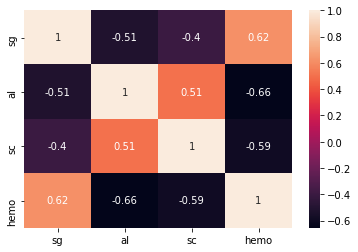

In [13]:
sb.heatmap(df.corr(),annot=True)

C:\Users\MARRIPELLI SAIKIRAN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MARRIPELLI SAIKIRAN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


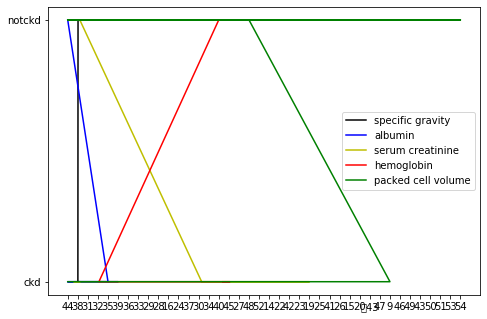

In [14]:
fig1=plt.figure()
ax=fig1.add_axes([0,0,1,1])
ax.plot(df['sg'],df['classification'],color='k',label='specific gravity')
ax.plot(df['al'],df['classification'],color='b',label='albumin')
ax.plot(df['sc'],df['classification'],color='y',label='serum creatinine')
ax.plot(df['hemo'],df['classification'],color='r',label='hemoglobin')
ax.plot(df['pcv'],df['classification'],color='g',label='packed cell volume')
ax.legend() 

Text(0, 0.5, 'Classification')

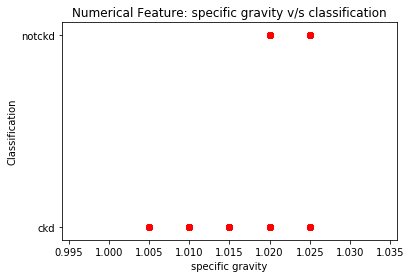

In [15]:
plt.scatter(df['sg'], df['classification'],color='red')
plt.title('Numerical Feature: specific gravity v/s classification')
plt.xlabel('specific gravity')
plt.ylabel('Classification')

Text(0, 0.5, 'Classification')

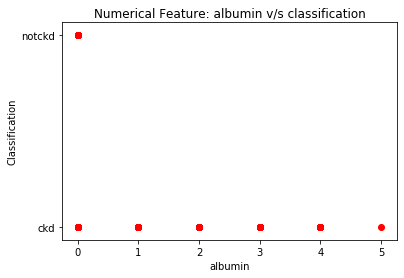

In [16]:
plt.scatter(df['al'], df['classification'],color='red')
plt.title('Numerical Feature: albumin v/s classification')
plt.xlabel('albumin')
plt.ylabel('Classification')

Text(0, 0.5, 'Classification')

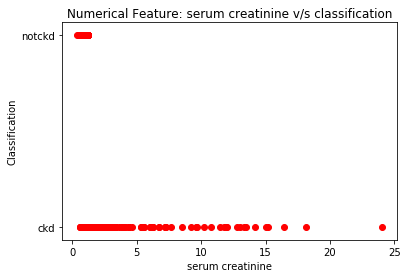

In [17]:
plt.scatter(df['sc'], df['classification'],color='red')
plt.title('Numerical Feature: serum creatinine v/s classification')
plt.xlabel('serum creatinine')
plt.ylabel('Classification')

Text(0, 0.5, 'Classification')

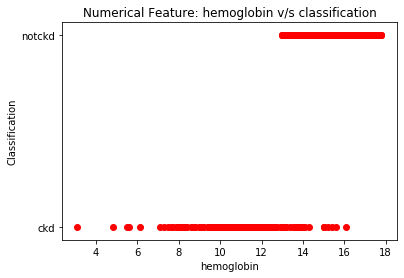

In [18]:
plt.scatter(df['hemo'], df['classification'],color='red')
plt.title('Numerical Feature: hemoglobin v/s classification')
plt.xlabel('hemoglobin')
plt.ylabel('Classification')

Text(0, 0.5, 'Classification')

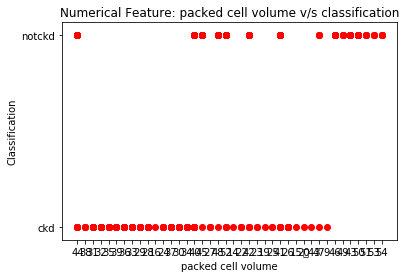

In [19]:
plt.scatter(df['pcv'], df['classification'],color='red')
plt.title('Numerical Feature: packed cell volume v/s classification')
plt.xlabel('packed cell volume')
plt.ylabel('Classification')

Text(0, 0.5, 'Classification')

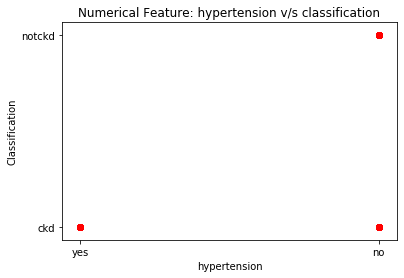

In [20]:
plt.scatter(df['htn'], df['classification'],color='red')
plt.title('Numerical Feature: hypertension v/s classification')
plt.xlabel('hypertension')
plt.ylabel('Classification')

# separating data into dependent and independent

In [21]:
x = df.iloc[:,0:6].values
x

array([[1.02, 1.0, 1.2, 15.4, '44', 'yes'],
       [1.02, 4.0, 0.8, 11.3, '38', 'no'],
       [1.01, 2.0, 1.8, 9.6, '31', 'no'],
       ...,
       [1.02, 0.0, 0.6, 15.8, '49', 'no'],
       [1.025, 0.0, 1.0, 14.2, '51', 'no'],
       [1.025, 0.0, 1.1, 15.8, '53', 'no']], dtype=object)

In [22]:
y=df.iloc[:,6:].values
y

array([['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       ['ckd'],
       [

# one hot encoding

In [23]:
ct=ColumnTransformer([("on",OneHotEncoder(),[5])],remainder="passthrough")
x=ct.fit_transform(x)
x

array([[0.0, 1.0, 1.02, ..., 1.2, 15.4, '44'],
       [1.0, 0.0, 1.02, ..., 0.8, 11.3, '38'],
       [1.0, 0.0, 1.01, ..., 1.8, 9.6, '31'],
       ...,
       [1.0, 0.0, 1.02, ..., 0.6, 15.8, '49'],
       [1.0, 0.0, 1.025, ..., 1.0, 14.2, '51'],
       [1.0, 0.0, 1.025, ..., 1.1, 15.8, '53']], dtype=object)

# removing dummy variables in x

In [24]:
x=x[:,1:]
x

array([[1.0, 1.02, 1.0, 1.2, 15.4, '44'],
       [0.0, 1.02, 4.0, 0.8, 11.3, '38'],
       [0.0, 1.01, 2.0, 1.8, 9.6, '31'],
       ...,
       [0.0, 1.02, 0.0, 0.6, 15.8, '49'],
       [0.0, 1.025, 0.0, 1.0, 14.2, '51'],
       [0.0, 1.025, 0.0, 1.1, 15.8, '53']], dtype=object)

# #label encoding

In [25]:
le=LabelEncoder()
y=le.fit_transform(y)
y

C:\Users\MARRIPELLI SAIKIRAN\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

# feature scaling

In [26]:
""" MIN MAX SCALER """
  
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
  
# Scaled feature 
x= min_max_scaler.fit_transform(x) 
x.round() 
  


array([[1., 1., 0., 0., 1., 1.],
       [0., 1., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 1., 1.],
       [0., 1., 0., 0., 1., 1.],
       [0., 1., 0., 0., 1., 1.]])

# splitting the data into training and testing sets

In [27]:

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

# APPLYING SUITABLE CLASSIFICATION ALGORITHM

In [28]:
#rfc = RandomForestClassifier (criterion = 'entropy',random_state = 0)
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(criterion='gini',random_state=0)
dt.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

# training and testing the model

In [29]:
x_test

array([[1.        , 0.25      , 0.2       , 0.05932203, 0.70748299,
        0.68888889],
       [0.        , 1.        , 0.        , 0.00847458, 0.89795918,
        0.86666667],
       [1.        , 0.75      , 0.2       , 0.02542373, 0.50340136,
        0.51111111],
       [0.        , 0.75      , 0.        , 0.01271186, 0.68707483,
        0.77777778],
       [0.        , 0.75      , 0.        , 0.02118644, 0.91836735,
        0.75555556],
       [0.        , 0.5       , 0.2       , 0.24152542, 0.29931973,
        0.4       ],
       [0.        , 0.5       , 0.4       , 0.08898305, 0.68707483,
        0.71111111],
       [0.        , 0.75      , 0.        , 0.02118644, 0.97959184,
        0.68888889],
       [1.        , 1.        , 0.        , 0.03813559, 0.65306122,
        0.62222222],
       [1.        , 0.25      , 0.6       , 0.09745763, 0.63945578,
        0.62222222],
       [0.        , 1.        , 0.        , 0.00423729, 0.91836735,
        0.68888889],
       [0.        , 0

In [30]:
x_train

array([[0.        , 0.25      , 0.2       , 0.02966102, 0.80952381,
        0.86666667],
       [0.        , 0.75      , 0.        , 0.03389831, 0.89115646,
        0.91111111],
       [0.        , 0.75      , 0.        , 0.03389831, 0.85714286,
        0.77777778],
       ...,
       [1.        , 0.5       , 0.6       , 0.12288136, 0.55782313,
        0.48888889],
       [0.        , 0.25      , 0.4       , 0.12288136, 0.53061224,
        0.62222222],
       [0.        , 1.        , 0.        , 0.02118644, 0.73469388,
        0.86666667]])

In [31]:
y_test

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0])

In [32]:
y_train

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1])

In [33]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [34]:
dt.predict(x_test)

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0])

In [35]:
y_pred=dt.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0])

In [36]:
x_train.shape

(229, 6)

# evaluation metrics

In [37]:
acc_score=accuracy_score(y_test,y_pred)

In [38]:
acc_score

0.9655172413793104

In [39]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.9655172413793103

No handles with labels found to put in legend.


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

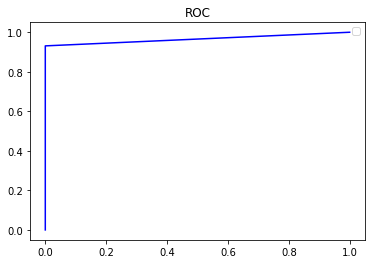

In [40]:
plt.title("ROC")
plt.plot(fpr,tpr,'b')
plt.legend()
plt.plot

In [41]:
from joblib import dump
dump(dt,'dt.save')

['dt.save']